# Install necessary packages

In [ ]:
import sys
print("Python " + sys.version)

import os
print("installing pre-requisite packages...")
! apt-get install libgfortran3
! apt-get install python3.6

print("installing casatools...")
! git clone https://github.com/r-xue/casa6-docker.git
! ln -s /content/casa6-docker/casa6_install/casa6_install.py casa6_install.py
! python casa6_install.py
print("building config files...")
!mkdir -p ~/.casa
!echo home, datapath = \'/content/\', [\'/content/\'] > ~/.casa/toolrc.py
!cat ~/.casa/toolrc.py

print("installing virtual frame buffer")
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay

print(os.getenv('DISPLAY'))

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

assert os.getenv('DISPLAY') != "" and os.getenv('DISPLAY') is not None
print('complete')

Python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
installing pre-requisite packages...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gcc-6-base
The following NEW packages will be installed:
  gcc-6-base libgfortran3
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 286 kB of archives.
After this operation, 1,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 gcc-6-base amd64 6.5.0-2ubuntu1~18.04 [16.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libgfortran3 amd64 6.5.0-2ubuntu1~18.04 [270 kB]
Fetched 286 kB in 0s (2,519 kB/s)
Selecting previously unselected package gcc-6-base:amd64.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../gcc-6-base_6.5.0-2ubuntu1~18.04_amd64.deb ...
Unpacking gcc-6-base:amd64 (6.5.0

In [ ]:
from casatasks import casalog
currentlogpos = 0
def runcasa(f, *args, **kwargs):
  """
    Runs a CASA task and prints the log
    Args:
      f: task method
      *args: positional arguments to the task f
      **kwargs: named arguments to the task f
    Returns the return value of f or None if failed
  """
  global currentlogpos
  if not os.path.exists(casalog.logfile()):
    with open(casalog.logfile(), "w+") as casalogfile:
      pass
  with open(casalog.logfile(), "r") as casalogfile:
    casalogfile.seek(currentlogpos)
    try:
      res = f(*args, **kwargs)
    finally:
      print(casalogfile.read())
      currentlogpos = casalogfile.tell()
  return res

# define the tasks on the current stack
# and wrap them inside a logger reader
import casatasks
import casatools
import casaplotms
from IPython.display import Image

def wrap_task(mod, tasks):
  for task in tasks:
    def logclosure(task):
      return lambda *args, **kwargs: runcasa(getattr(mod, task),
                                             *args,
                                             **kwargs)
    setattr(sys.modules[__name__], 
        task,
        logclosure(task))
    getattr(sys.modules[__name__], task).__doc__ = \
      getattr(mod, task).__doc__

wrap_task(casatools, ['agentflagger','atcafiller','atmosphere','calanalysis',
                      'calibrater','casadata','coercetype','componentlist',
                      'coordsys','ctsys','ctuser','errors','image','imagemetadata',
                      'imagepol','imager','iterbotsink','linearmosaic','logsink',
                      'measures','miriadfiller','ms','msmetadata','mstransformer',
                      'platform','quanta','regionmanager','sakura','sdm',
                      'sidebandseparator','simulator','singledishms','spectralline',
                      'synthesisdeconvolver','synthesisimager','synthesisimstore',
                      'synthesismaskhandler','synthesisnormalizer','synthesisutils',
                      'table','typecheck','utils','version','version_string',
                      'vlafiller','vpmanager'])

wrap_task(casatasks, ['accor','apparentsens','applycal',
                      'asdmsummary','atexit','bandpass',
                      'blcal','calstat',
                      'casatelemetry','clearcal',
                      'clearstat','concat','config',
                      'conjugatevis','cvel','cvel2',
                      'delmod','exportasdm','exportfits',
                      'exportuvfits','feather','fixplanets',
                      'fixvis','flagcmd','flagdata','flagmanager',
                      'fluxscale','fringefit','ft','gaincal',
                      'gencal','hanningsmooth','imcollapse',
                      'imcontsub','imdev','imfit','imhead',
                      'imhistory','immath','immoments','impbcor','importasap',
                      'importasdm','importatca','importfits','importfitsidi','importgmrt',
                      'importlib','importmiriad','importnro','importuvfits','importvla',
                      'impv','imrebin','imreframe','imregrid','imsmooth','imstat',
                      'imsubimage','imtrans','imval','initweights','listcal',
                      'listfits','listhistory','listobs','listpartition','listsdm',
                      'listvis','logstop','makemask','mstransform','nrobeamaverage',
                      'partition','platform','plotants','plotbandpass','plotprofilemap',
                      'plotweather','polcal','polfromgain','predictcomp','rerefant',
                      'rmfit','rmtables','sdatmcor','sdbaseline','sdcal',
                      'sdfit','sdfixscan','sdgaincal','sdimaging','sdintimaging',
                      'sdpolaverage','sdsidebandsplit','sdsmooth','sdtimeaverage',          
                      'setjy','simalma','simanalyze','simobserve','slsearch','smoothcal',
                      'specfit','specflux','specsmooth','splattotable','split',
                      'spxfit','statwt','tclean','testconcat','tsdimaging','uvcontsub',
                      'uvcontsub3','uvmodelfit','uvsub','virtualconcat','vishead',
                      'visstat','widebandpbcor'])
wrap_task(casaplotms, ["plotms"])

Creating a new telemetry file


Telemetry initialized. Telemetry will send anonymized usage statistics to NRAO.
You can disable telemetry by adding the following line to the config.py file in your rcdir (e.g. ~/.casa/config.py):
telemetry_enabled = False


In [ ]:
! pip install -U setuptools==51.3.3
! wget https://github.com/SpheMakh/cleanmask/archive/refs/tags/1.3.1.tar.gz
! tar -xvf 1.3.1.tar.gz
! pip install -v ./cleanmask-1.3.1

     |████████████████████████████████| 788kB 12.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 57.0.0
    Uninstalling setuptools-57.0.0:
      Successfully uninstalled setuptools-57.0.0


--2021-06-28 00:11:23--  https://github.com/SpheMakh/cleanmask/archive/refs/tags/1.3.1.tar.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/SpheMakh/cleanmask/tar.gz/refs/tags/1.3.1 [following]
--2021-06-28 00:11:23--  https://codeload.github.com/SpheMakh/cleanmask/tar.gz/refs/tags/1.3.1
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘1.3.1.tar.gz’

1.3.1.tar.gz            [ <=>                ]   5.23K  --.-KB/s    in 0s      

2021-06-28 00:11:23 (48.3 MB/s) - ‘1.3.1.tar.gz’ saved [5353]

cleanmask-1.3.1/
cleanmask-1.3.1/.travis.yml
cleanmask-1.3.1/Dockerfile
cleanmask-1.3.1/MANIFEST.in
cleanmask-1.3.1/README.md
cleanmas

# Download data into colab file system

We will download and extract the data into ```/content/ARIWS/```
This is a temporary place for your data to live and it will disappear when the host shuts down or you close the connection! You can always restore the data to its factory raw state using the following code

In [ ]:
! rm -rf /content/ARIWS
! mkdir -p /content/ARIWS
! wget ftp://elwood.ru.ac.za/pub/hugo/ARIWS.INTROFIMAGING.TriA.1559937657.tar.gz -P /content/ARIWS
! tar -zxf /content/ARIWS/ARIWS.INTROFIMAGING.TriA.1559937657.tar.gz -C /content/ARIWS

PRIMDB = "/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms"
SECDB = "/content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms"
TARGETDB = "/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms"

--2021-06-28 00:11:27--  ftp://elwood.ru.ac.za/pub/hugo/ARIWS.INTROFIMAGING.TriA.1559937657.tar.gz
           => ‘/content/ARIWS/ARIWS.INTROFIMAGING.TriA.1559937657.tar.gz’
Resolving elwood.ru.ac.za (elwood.ru.ac.za)... 146.231.135.133
Connecting to elwood.ru.ac.za (elwood.ru.ac.za)|146.231.135.133|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/hugo ... done.
==> SIZE ARIWS.INTROFIMAGING.TriA.1559937657.tar.gz ... 324244140
==> PASV ... done.    ==> RETR ARIWS.INTROFIMAGING.TriA.1559937657.tar.gz ... done.
Length: 324244140 (309M) (unauthoritative)

ARIWS.INTROFIMAGING 100%[===================>] 309.22M  14.0MB/s    in 31s     

2021-06-28 00:12:01 (10.0 MB/s) - ‘/content/ARIWS/ARIWS.INTROFIMAGING.TriA.1559937657.tar.gz’ saved [324244140]



# Getting help


At any point should you need help get the help string for the task you want to use. E.g. the listobs lister.

In [ ]:
help(listobs)

Help on function <lambda> in module __main__:

<lambda> lambda *args, **kwargs
    listobs ---- List the summary of a data set in the logger or in a file
    
    
    List the summary information of a data set in the logger or in a file, based on
    a data selection. Only rows can be selected and printed. No in-row selection is
    possible (channel or correlation).
    
    Lists the following properties of a measurement set:
    scan list, field list, spectral window list with
    correlators, antenna locations, ms table information.
    
    
    --------- parameter descriptions ---------------------------------------------
    
    vis         Name of input visibility file (MS)
    selectdata  Data selection parameters
    spw         Selection based on spectral-window/frequency/channel.
    field       Selection based on field names or field index numbers. Default is all.
    antenna     Selection based on antenna/baselines. Default is all.
    uvrange     Selection based on uv 

#Lister & flag management


To find out what is contained in each of the observations we use the ```listobs``` command. Here I've provided a simple wrapper method to also read what the task has written to the casa log for your convenience. Inside the casa shell outside a notebook you can call the casa tasks directly provided that you specify the ```--log2term``` command to the casapy interpreter.

We have three separate databases containing the primary ```PRIMDB```, secondary ```SECDB``` and target ```TARGETDB``` fields. If we run listobs on each of them we get get the field names, scan times (continuous chunks of time spent tracking the source), integration durations, intent and some other information here. Note that from the intent you can see that:

- J1939-6342 is intended as the primary or bandpass calibrator
- J1859-6615 is intended as the secondary calibrator
- RXCJ1638.2-6420 is the intended science target field.

We have only given you data between 1.0 - 1.1 GHz channelized at 836kHz. Please peruse these logs to make sure you can find all the information I just stated.

In [ ]:
listobs(PRIMDB)
listobs(SECDB)
listobs(TARGETDB)
pass

2021-06-28 00:11:11	INFO	::casa	
2021-06-28 00:11:12	INFO	::casa	CASA Version MODULAR 6.2.0.124
2021-06-28 00:11:12	INFO	::casa	
2021-06-28 00:11:12	INFO	::casa	Telemetry log file: /root/.casa/casastats-6.2.0.124-242ac1c02-20210628-001111.log
2021-06-28 00:11:12	INFO	::casa	Checking telemetry submission interval
2021-06-28 00:11:12	INFO	::casa	Creating a new telemetry time stamp file./root/.casa/telemetry-242ac1c02.stamp
2021-06-28 00:11:12	INFO	::casa	Telemetry submit interval not reached. Not submitting data.
2021-06-28 00:11:12	INFO	::casa	Next telemetry data submission in: 6 days, 23:59:59.998959
2021-06-28 00:12:06	INFO	listobs::::casa	##########################################
2021-06-28 00:12:06	INFO	listobs::::casa	##### Begin Task: listobs            #####
2021-06-28 00:12:06	INFO	listobs::::casa	listobs( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', selectdata=True, spw='', field='', antenna='', uvrange='', timerange='', correlation='', s

We always start off by backing up the flags set by the observatory in case of mishaps during our processing (during either handflagging, automatic RFI flagging or gain application). This can be achieved using the ```flagmanager``` task

In [ ]:
flagmanager(vis=PRIMDB, mode="save", versionname="OBSERVATORY_FLAGS")
flagmanager(vis=SECDB, mode="save", versionname="OBSERVATORY_FLAGS")
flagmanager(vis=TARGETDB, mode="save", versionname="OBSERVATORY_FLAGS")

2021-06-28 00:12:07	INFO	flagmanager::::casa	##########################################
2021-06-28 00:12:07	INFO	flagmanager::::casa	##### Begin Task: flagmanager        #####
2021-06-28 00:12:07	INFO	flagmanager::::casa	flagmanager( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', mode='save', versionname='OBSERVATORY_FLAGS', oldname='', comment='', merge='replace' )
2021-06-28 00:12:07	INFO	flagmanager::AgentFlagger::open	Table type is Measurement Set
2021-06-28 00:12:07	INFO	flagmanager::::casa	Save current flagversions to OBSERVATORY_FLAGS
2021-06-28 00:12:07	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called OBSERVATORY_FLAGS
2021-06-28 00:12:07	INFO	flagmanager::::casa	Task flagmanager complete. Start time: 2021-06-28 00:12:06.549444 End time: 2021-06-28 00:12:06.788133
2021-06-28 00:12:07	INFO	flagmanager::::casa	##### End Task: flagmanager          #####
2021-06-28 00:12:07	INFO	flagmanager::::casa	#########################

At this point the data should be essentially unflagged. There were no serious issues seen by the observatory on any of the antennae we have selected. Note that we have selected only 12 out of the available antennae to keep this illustrative dataset small. You should monitor these numbers as you apply calibration. Typically the best course of action to take if a calibration cycle failed is to roll back the flag set to a state prior to calibration

In [ ]:
flagdata(mode="summary", vis=PRIMDB)
flagdata(mode="summary", vis=SECDB)
flagdata(mode="summary", vis=TARGETDB)
pass

2021-06-28 00:12:07	INFO	flagdata::::casa	##########################################
2021-06-28 00:12:07	INFO	flagdata::::casa	##### Begin Task: flagdata           #####
2021-06-28 00:12:07	INFO	flagdata::::casa	flagdata( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', mode='summary', autocorr=False, inpfile='', reason='any', tbuff=0.0, spw='', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', array='', observation='', feed='', clipminmax=[], datacolumn='DATA', clipoutside=True, channelavg=False, chanbin=1, timeavg=False, timebin='0s', clipzeros=False, quackinterval=1.0, quackmode='beg', quackincrement=False, tolerance=0.0, addantenna='', lowerlimit=0.0, upperlimit=90.0, ntime='scan', combinescans=False, timecutoff=4.0, freqcutoff=3.0, timefit='line', freqfit='poly', maxnpieces=7, flagdimension='freqtime', usewindowstats='none', halfwin=1, extendflags=True, winsize=3, timedev='', freqdev='', timedevscale=5.0, freqdev

# Calibrator inspection, flagging and transfer

Lets start by looking for channels with RFI. Manmade sources of RFI is typically highly polarized signals - such as the circularly polarized GNSS signals. We look in the crosshands which is a combination of parallactic angle rotated linear polarization and circular polarization. We may miss some RFI that is in the rotated Stokes Q component this way, but we should be able to get a significant portion of the RFI affected channels this way. Also note that depending on baseline length (below first plotted up to 100m) is more affected by RFI than spacings further away. Here we first plot the primary source (bandpass calibrator).

Why is this you may ask?

Well at any declination at least a few degrees away from the celestial poles the sky fringes rotate over partially-coherent sources of RFI such as the GNSS network in the near field. As we integrate over these moving fringes through averaging in the correlator (and any further averaging applied by the user) the amplitude of the final complex fringe diminishes. If you are still not convinced draw two vectors on the complex plane with same argument - if you take the geometric mean you will notice that as the argument between the angles increase the argument of the vector to the average point decreases in length.

We can use this to flag the long spacings less than the short spacings - I leave this up to you as an exercise to visualize and mark bad portions of data in your own time. We typically use automated flagging, but it is good exercise to go through the flagging process by hand as it is necessary to flag portions of data by hand from time to time.

2021-06-28 00:12:08	INFO	plotms::::casa	##########################################
2021-06-28 00:12:08	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:08	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='frequency', xdatacolumn='', xframe='', xinterp='', yaxis='amp', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='1~100m', antenna='', scan='', correlation='XY,YX', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysha

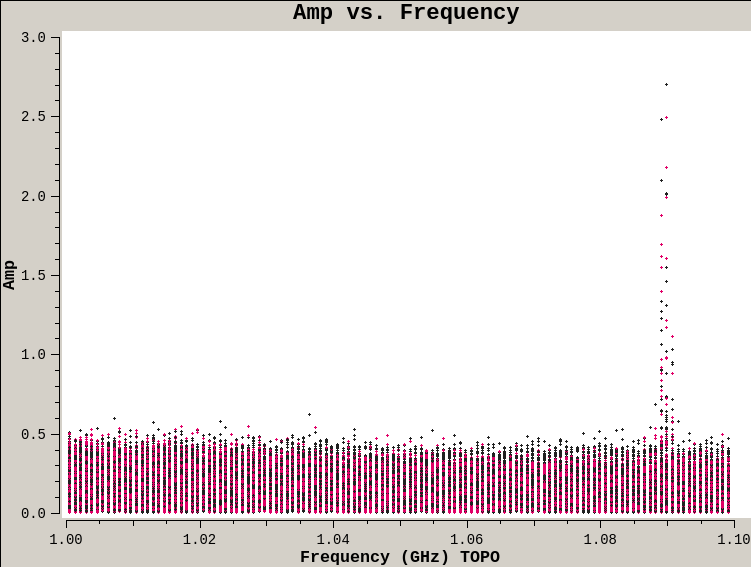

In [ ]:
plotms(vis=PRIMDB, xaxis="frequency", yaxis="amp", correlation="XY,YX", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=False, uvrange="1~100m", 
       plotfile="primary.short.raw.ampfreq.png", showgui=False, overwrite=True)
Image("primary.short.raw.ampfreq.png")

We mark these channels 1.087~1.0915GHz from inspection.

Lets now plot distances > 2000m on the uv plane. As you can see the RFI is significantly washed out by the fringes of the longer spacings.

2021-06-28 00:12:11	INFO	plotms::::casa	##########################################
2021-06-28 00:12:11	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:11	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='frequency', xdatacolumn='', xframe='', xinterp='', yaxis='amp', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='>2000m', antenna='', scan='', correlation='XY,YX', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysha

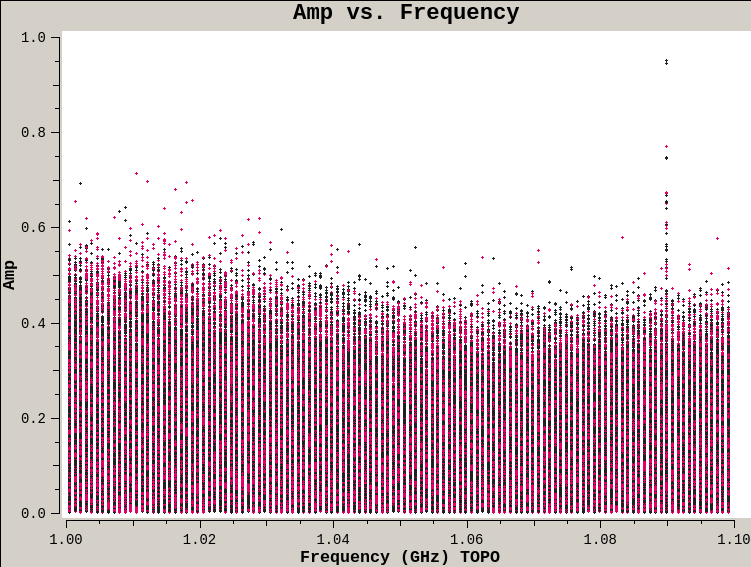

In [ ]:
plotms(vis=PRIMDB, xaxis="frequency", yaxis="amp", correlation="XY,YX", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=False, uvrange=">2000m", 
       plotfile="primary.long.raw.ampfreq.png", showgui=False, overwrite=True)
Image("primary.long.raw.ampfreq.png")

Let's go ahead and flagged the channels coarsely using the range we got from the short spacings. I leave it to you as an exercise to more carefully inspect the data in time and in uvlength to flag on finer grain.

2021-06-28 00:12:17	INFO	flagdata::::casa	##########################################
2021-06-28 00:12:17	INFO	flagdata::::casa	##### Begin Task: flagdata           #####
2021-06-28 00:12:17	INFO	flagdata::::casa	flagdata( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', mode='manual', autocorr=False, inpfile='', reason='any', tbuff=0.0, spw='0:1.087~1.0915ghz', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', array='', observation='', feed='', clipminmax=[], datacolumn='DATA', clipoutside=True, channelavg=False, chanbin=1, timeavg=False, timebin='0s', clipzeros=False, quackinterval=1.0, quackmode='beg', quackincrement=False, tolerance=0.0, addantenna='', lowerlimit=0.0, upperlimit=90.0, ntime='scan', combinescans=False, timecutoff=4.0, freqcutoff=3.0, timefit='line', freqfit='poly', maxnpieces=7, flagdimension='freqtime', usewindowstats='none', halfwin=1, extendflags=True, winsize=3, timedev='', freqdev='', timedevsc

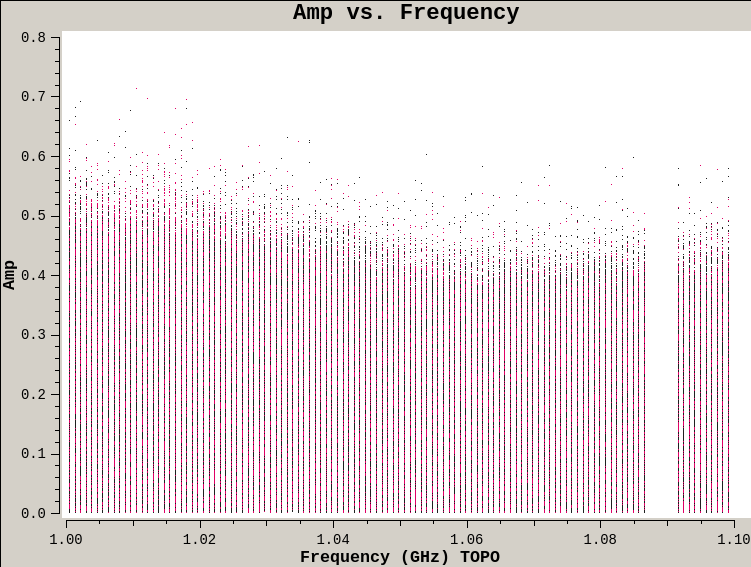

In [ ]:
flagdata(vis=PRIMDB, spw="0:1.087~1.0915ghz")
plotms(vis=PRIMDB, xaxis="frequency", yaxis="amp", correlation="XY,YX", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=False, uvrange=">1m",
       plotfile="primary.raw.ampfreq.png", showgui=False, overwrite=True)
Image("primary.raw.ampfreq.png")

Some of the antennae still have issues at the edges of the calibrator scans which should be removed. I leave this as an exercise for you to track down!

2021-06-28 00:12:25	INFO	plotms::::casa	##########################################
2021-06-28 00:12:25	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:25	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='time', xdatacolumn='', xframe='', xinterp='', yaxis='amp', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='>1m', antenna='', scan='', correlation='XX,YY', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=True, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysharedaxis=F

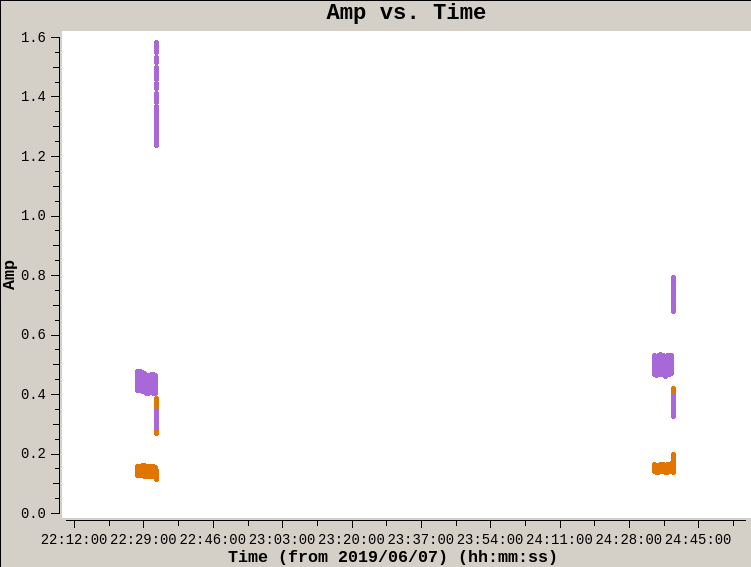

In [ ]:
plotms(vis=PRIMDB, xaxis="time", yaxis="amp", correlation="XX,YY", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=True, uvrange=">1m",
       plotfile="primary.raw.amptime.png", showgui=False, overwrite=True)
Image("primary.raw.amptime.png")

At this point we move on to inspecting the calibration quality of the raw data. We explicitly assume that the calibrators is a **unresolved** point source at precisely the phase tracking centre of the interferometer. The Fourier transform of a delta function at the DC position is a constant - therefore the visibilities should be a ball of noise centred at some amplitude with no phase (imaginary) component.

However, what we notice is nothing like this! The data has large uncalibrated phase and the amplitude currently has no scale attached.

2021-06-28 00:12:28	INFO	plotms::::casa	##########################################
2021-06-28 00:12:28	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:28	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='real', xdatacolumn='', xframe='', xinterp='', yaxis='imag', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='>1m', antenna='', scan='', correlation='XX,YY', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysharedaxis

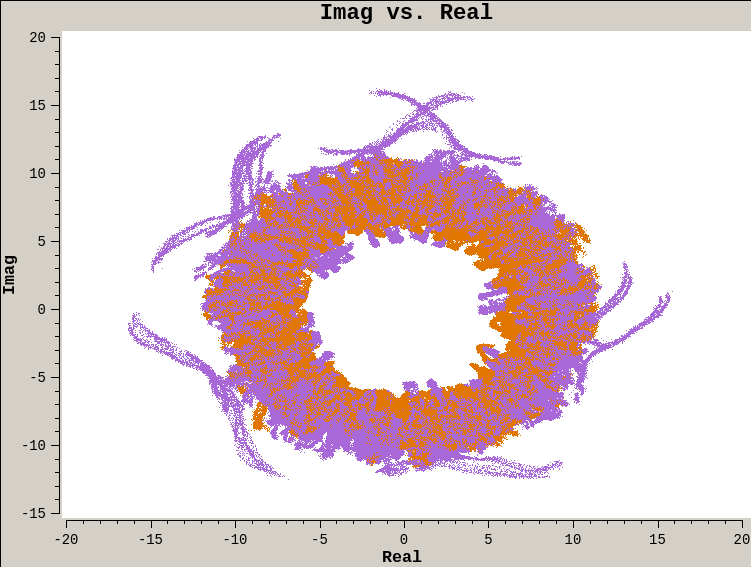

In [ ]:
plotms(vis=PRIMDB, xaxis="real", yaxis="imag", correlation="XX,YY", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=False, uvrange=">1m",
       plotfile="primary.raw.reim.png", showgui=False, overwrite=True)
Image("primary.raw.reim.png")

Part of the reason why we picked this bright compact source is that it is very well known and its spectrum has been monitored by various observatories throughout the years. We will use the Reynolds 94 model of the spectrum of this unpolarized quasar with Gigahertz Peaked Spectrum (GPS) to set the flux scale of the system channel by channel for every antenna (a frequency-dependent diagonal gain matrix B). We further disentangle this to a  frequency slope (K - or cable delay time variable) and average offset (G - diagonal gain matrix, time variable) in amplitude and phase so that we get a normalized bandpass matrix in B. The amplitude at centre of band is 14.8 Jy for this source.

This is known as "KGB" calibration. Not to be confused for a certain former state security agency!!

In [ ]:
setjy(vis=PRIMDB, standard="Stevens-Reynolds 2016", field="J1939-6342")

2021-06-28 00:12:33	INFO	setjy::::casa	##########################################
2021-06-28 00:12:33	INFO	setjy::::casa	##### Begin Task: setjy              #####
2021-06-28 00:12:33	INFO	setjy::::casa	setjy( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', field='J1939-6342', spw='', selectdata=False, timerange='', scan='', intent='', observation='', scalebychan=True, standard='Stevens-Reynolds 2016', model='', modimage='', listmodels=False, fluxdensity=-1, spix=0.0, reffreq='1GHz', polindex=[], polangle=[], rotmeas=0.0, fluxdict={}, useephemdir=False, interpolation='nearest', usescratch=False, ismms=False )
2021-06-28 00:12:33	INFO	setjy::::casa	{'field': 'J1939-6342'}
2021-06-28 00:12:33	INFO	Imager::open() 	Opening MeasurementSet /content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms
2021-06-28 00:12:33	INFO	imager::setjy()	Using channel dependent flux densities
2021-06-28 00:12:33	INFO	imager::setjy()	  J1939-6342 (fld ind 

{'0': {'0': {'fluxd': array([14.8072117,  0.       ,  0.       ,  0.       ])},
  'fieldName': 'J1939-6342'},
 'format': "{field Id: {spw Id: {fluxd: [I,Q,U,V] in Jy}, 'fieldName':field name }}"}

The cable delays are all small residuals as they have already been corrected for by the online MeerKAT calibration pipeline.

2021-06-28 00:12:33	INFO	gaincal::::casa	##########################################
2021-06-28 00:12:33	INFO	gaincal::::casa	##### Begin Task: gaincal            #####
2021-06-28 00:12:33	INFO	gaincal::::casa	gaincal( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', caltable='prim.K0', field='J1939-6342', spw='', intent='', selectdata=True, timerange='', uvrange='', antenna='', scan='', observation='', msselect='', solint='inf', combine='', preavg=-1.0, refant='m000', refantmode='flex', minblperant=4, minsnr=3.0, solnorm=False, normtype='mean', gaintype='K', smodel=[], calmode='ap', solmode='', rmsthresh=[], corrdepflags=False, append=False, splinetime=3600.0, npointaver=3, phasewrap=180.0, docallib=False, callib='', gaintable=[], gainfield=[], interp=[], spwmap=[], parang=False )
2021-06-28 00:12:33	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
2021-06-28 00:12:33	INFO	gaincal::calibrater::open	Opening MS: /content/ARIWS

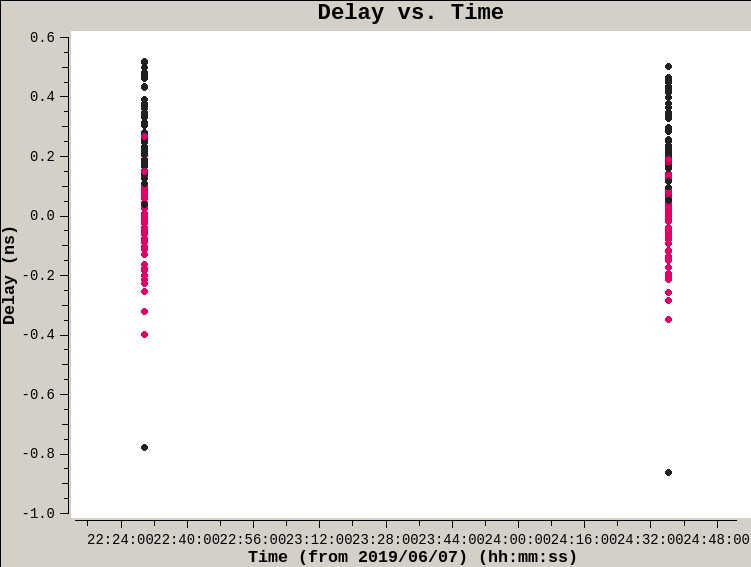

In [ ]:
# from inspection pick any antenna that have no obvious temporal problems and which raw
# amplitude is within the rest of the group. This will act as phase zero point for the
# interferometer. One solution per scan (no straddling of the scan boundary).
gaincal(vis=PRIMDB, field="J1939-6342", caltable="prim.K0", gaintype="K", refant="m000",
        combine="", solint="inf") 
plotms(vis="prim.K0", xaxis="time", yaxis="delay", 
       coloraxis="corr", plotfile="primary.K0.png", 
       showgui=False, overwrite=True)
Image("primary.K0.png")

When we look at the constant phase and amplitude - as we can see most of the spread in phase we saw in the Real v Imag visibility plot above can be contributed to a large spread antenna-based phases.

In [ ]:
# we interpolate these cable delays over the data before computing the average gain term
gaincal(vis=PRIMDB, field="J1939-6342", caltable="prim.G0", gaintype="G", refant="m000", 
        interp=["nearest"], gaintable=["prim.K0"], 
        gainfield=["J1939-6342"], combine="", solint="inf")
plotms(vis="prim.G0", xaxis="time", yaxis="gainamp", 
       coloraxis="corr", plotfile="primary.G0.amp.png", 
       showgui=False, overwrite=True)
plotms(vis="prim.G0", xaxis="time", yaxis="gainphase", 
       coloraxis="corr", plotfile="primary.G0.phase.png", 
       showgui=False, overwrite=True)

2021-06-28 00:12:36	INFO	gaincal::::casa	##########################################
2021-06-28 00:12:36	INFO	gaincal::::casa	##### Begin Task: gaincal            #####
2021-06-28 00:12:36	INFO	gaincal::::casa	gaincal( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', caltable='prim.G0', field='J1939-6342', spw='', intent='', selectdata=True, timerange='', uvrange='', antenna='', scan='', observation='', msselect='', solint='inf', combine='', preavg=-1.0, refant='m000', refantmode='flex', minblperant=4, minsnr=3.0, solnorm=False, normtype='mean', gaintype='G', smodel=[], calmode='ap', solmode='', rmsthresh=[], corrdepflags=False, append=False, splinetime=3600.0, npointaver=3, phasewrap=180.0, docallib=False, callib='', gaintable=['prim.K0'], gainfield=['J1939-6342'], interp=['nearest'], spwmap=[], parang=False )
2021-06-28 00:12:36	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
2021-06-28 00:12:36	INFO	gaincal::calibrater::o

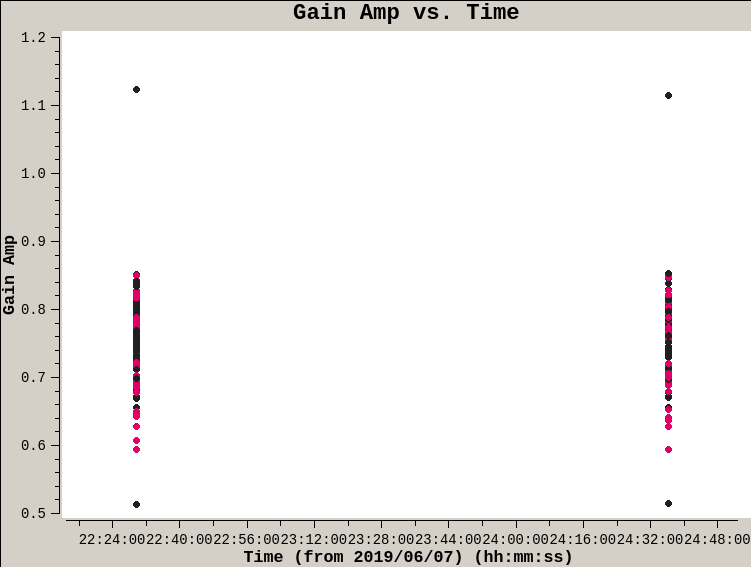

In [ ]:
Image("primary.G0.amp.png")

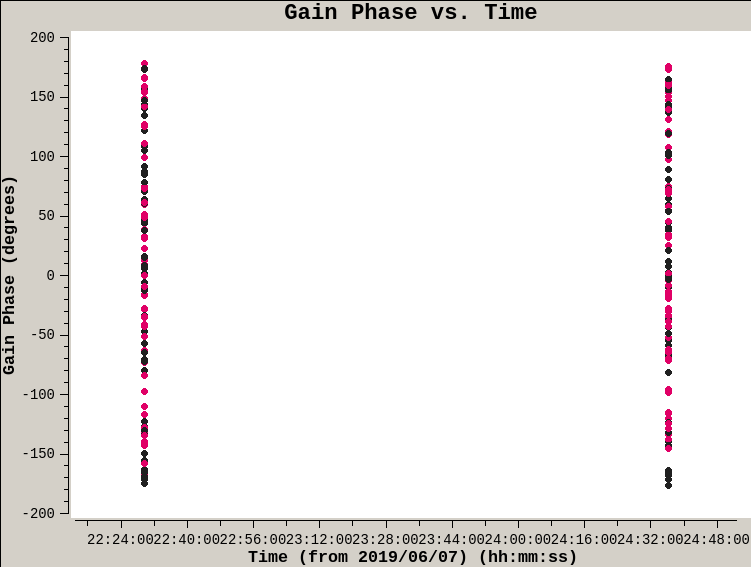

In [ ]:
Image("primary.G0.phase.png")

2021-06-28 00:12:39	INFO	bandpass::::casa	##########################################
2021-06-28 00:12:39	INFO	bandpass::::casa	##### Begin Task: bandpass           #####
2021-06-28 00:12:39	INFO	bandpass::::casa	bandpass( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', caltable='prim.B0', field='J1939-6342', spw='', intent='', selectdata=True, timerange='', uvrange='', antenna='', scan='', observation='', msselect='', solint='inf', combine='scan', refant='m000', minblperant=4, minsnr=3.0, solnorm=False, bandtype='B', smodel=[], corrdepflags=False, append=False, fillgaps=50, degamp=3, degphase=3, visnorm=False, maskcenter=0, maskedge=5, docallib=False, callib='', gaintable=['prim.K0', 'prim.G0'], gainfield=['J1939-6342', 'J1939-6342'], interp=['nearest', 'linear'], spwmap=[], parang=False )
2021-06-28 00:12:39	INFO	bandpass::calibrater::open	****Using NEW VI2-driven calibrater tool****
2021-06-28 00:12:39	INFO	bandpass::calibrater::open	Opening MS: /c

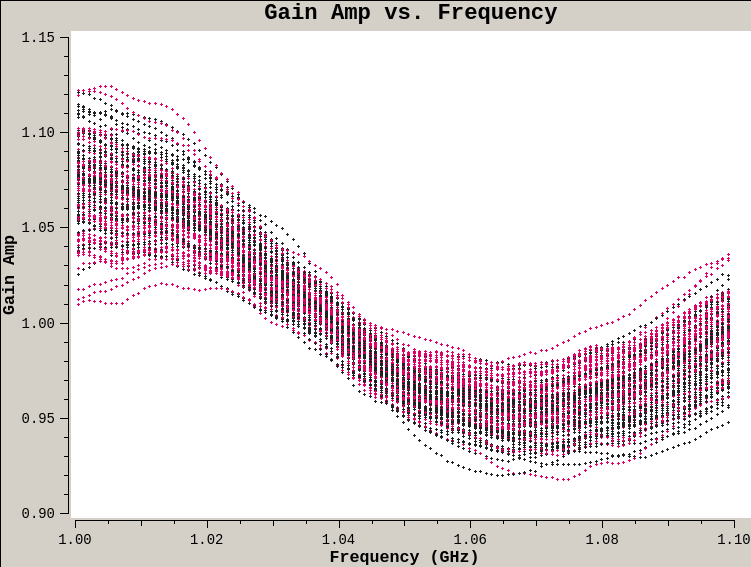

In [ ]:
# now solve for 1 bandpass solution over the entire observation on the
# primary field. This solution is normalized
bandpass(vis=PRIMDB, field="J1939-6342", caltable="prim.B0", refant="m000", 
        interp=["nearest", "linear"], gaintable=["prim.K0", "prim.G0"], 
        gainfield=["J1939-6342", "J1939-6342"], combine="scan", solint="inf",
        fillgaps=50) 
plotms(vis="prim.B0", xaxis="frequency", yaxis="gainamp", 
       coloraxis="corr", plotfile="primary.B0.amp.png", 
       showgui=False, overwrite=True)
Image("primary.B0.amp.png")

We now apply gains to correct the primary calibrator to judge whether the residual spread in phase has been corrected. It is very important to view the visibilities after corrections and not just blind application of gains. We see that the spread in phase is removed through antenna-based gains in this instance.


In [ ]:
applycal(vis=PRIMDB, field="J1939-6342",
         interp=["nearest", "linear", "linear"], 
         gaintable=["prim.K0", "prim.G0", "prim.B0"], 
         gainfield=["J1939-6342", "J1939-6342", "J1939-6342"])

2021-06-28 00:12:41	INFO	applycal::::casa	##########################################
2021-06-28 00:12:41	INFO	applycal::::casa	##### Begin Task: applycal           #####
2021-06-28 00:12:41	INFO	applycal::::casa	applycal( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', field='J1939-6342', spw='', intent='', selectdata=True, timerange='', uvrange='', antenna='', scan='', observation='', msselect='', docallib=False, callib='', gaintable=['prim.K0', 'prim.G0', 'prim.B0'], gainfield=['J1939-6342', 'J1939-6342', 'J1939-6342'], interp=['nearest', 'linear', 'linear'], spwmap=[], calwt=[True], parang=False, applymode='', flagbackup=True )
2021-06-28 00:12:41	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
2021-06-28 00:12:41	INFO	applycal::calibrater::open	Opening MS: /content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms for calibration.
2021-06-28 00:12:41	INFO	applycal::VisSetUtil::addScrCols	Adding CORRE

2021-06-28 00:12:42	INFO	plotms::::casa	##########################################
2021-06-28 00:12:42	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:42	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='real', xdatacolumn='corrected', xframe='', xinterp='', yaxis='imag', ydatacolumn='corrected', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='>1m', antenna='', scan='', correlation='XX,YY', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=Fals

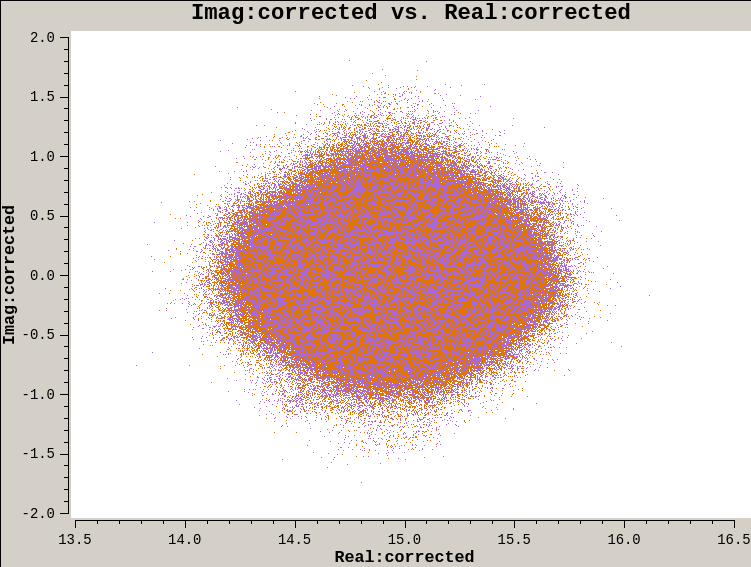

In [ ]:
plotms(vis=PRIMDB, xaxis="real", yaxis="imag", correlation="XX,YY", ydatacolumn="corrected", 
       xdatacolumn="corrected", coloraxis="corr", avgbaseline=False, uvrange=">1m",
       plotfile="primary.corr.reim.png", showgui=False, overwrite=True)
Image("primary.corr.reim.png")

We can now proceed to transfer these gains to correct the amplitude and phase of the secondary. As the reader can see below the transferred phase corrections are far from perfect so far away from the primary - what should be a ball resembles something closer to the Crescent Moon! We then need to follow the same procedure as before to remove RFI from the secondary, which should be much easier to spot with partially corrected visibilities.

In [ ]:
applycal(vis=SECDB, field="J1859-6615",
         interp=["nearest", "linear", "linear"], 
         gaintable=["prim.K0", "prim.G0", "prim.B0"], 
         gainfield=["J1939-6342", "J1939-6342", "J1939-6342"])

2021-06-28 00:12:47	INFO	applycal::::casa	##########################################
2021-06-28 00:12:47	INFO	applycal::::casa	##### Begin Task: applycal           #####
2021-06-28 00:12:47	INFO	applycal::::casa	applycal( vis='/content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms', field='J1859-6615', spw='', intent='', selectdata=True, timerange='', uvrange='', antenna='', scan='', observation='', msselect='', docallib=False, callib='', gaintable=['prim.K0', 'prim.G0', 'prim.B0'], gainfield=['J1939-6342', 'J1939-6342', 'J1939-6342'], interp=['nearest', 'linear', 'linear'], spwmap=[], calwt=[True], parang=False, applymode='', flagbackup=True )
2021-06-28 00:12:47	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
2021-06-28 00:12:47	INFO	applycal::calibrater::open	Opening MS: /content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms for calibration.
2021-06-28 00:12:47	INFO	applycal::VisSetUtil::addScrCols	Adding CORRECTED_DATA co

2021-06-28 00:12:49	INFO	plotms::::casa	##########################################
2021-06-28 00:12:49	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:49	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='frequency', xdatacolumn='', xframe='', xinterp='', yaxis='amp', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='1~100m', antenna='', scan='', correlation='XY,YX', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysharedaxi

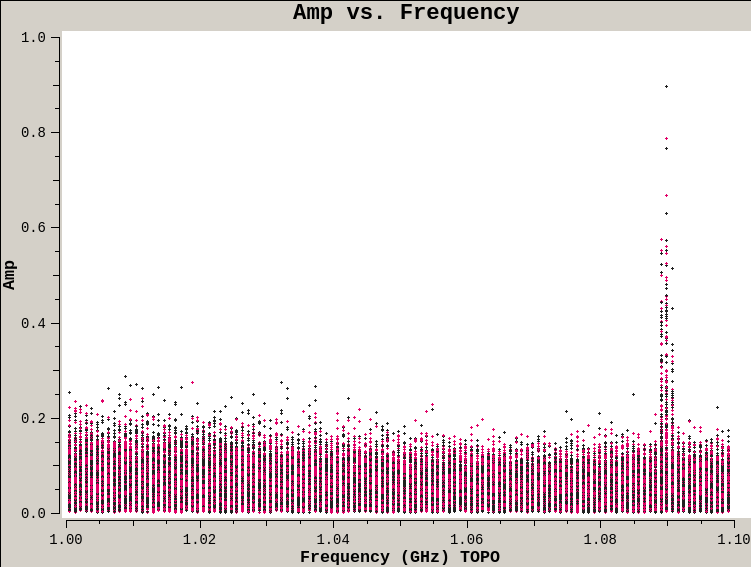

In [ ]:
plotms(vis=SECDB, xaxis="frequency", yaxis="amp", correlation="XY,YX", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=False, uvrange="1~100m", 
       plotfile="secondary.short.raw.ampfreq.png", showgui=False, overwrite=True)
Image("secondary.short.raw.ampfreq.png")

2021-06-28 00:12:51	INFO	plotms::::casa	##########################################
2021-06-28 00:12:51	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:51	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='time', xdatacolumn='', xframe='', xinterp='', yaxis='amp', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='>1m', antenna='', scan='', correlation='XX,YY', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=True, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysharedaxis=False, 

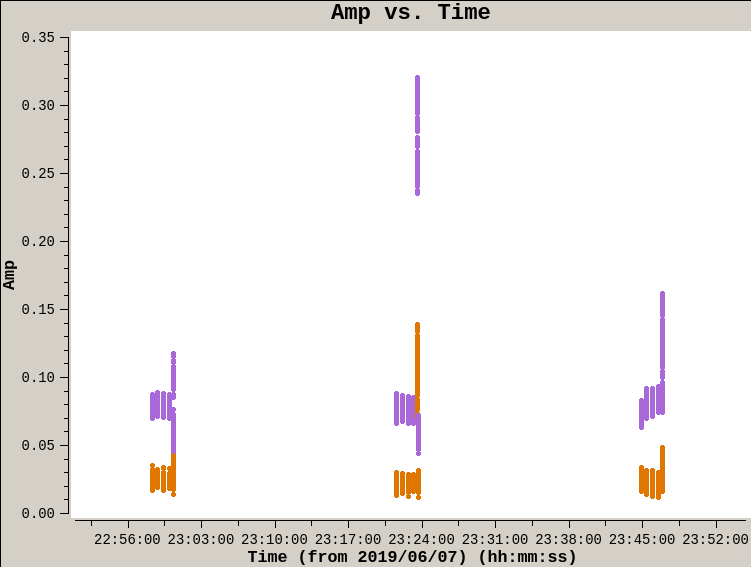

In [ ]:
plotms(vis=SECDB, xaxis="time", yaxis="amp", correlation="XX,YY", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=True, uvrange=">1m",
       plotfile="secondary.raw.amptime.png", showgui=False, overwrite=True)
Image("secondary.raw.amptime.png")

2021-06-28 00:12:53	INFO	plotms::::casa	##########################################
2021-06-28 00:12:53	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:12:53	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='real', xdatacolumn='corrected', xframe='', xinterp='', yaxis='imag', ydatacolumn='corrected', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='>1m', antenna='', scan='', correlation='XX,YY', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysh

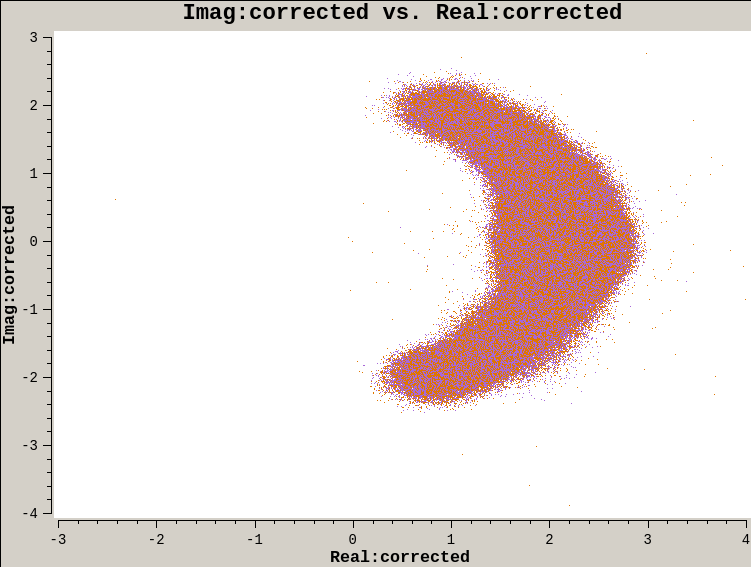

In [ ]:
plotms(vis=SECDB, xaxis="real", yaxis="imag", correlation="XX,YY", ydatacolumn="corrected", 
       xdatacolumn="corrected", coloraxis="corr", avgbaseline=False, uvrange=">1m",
       plotfile="secondary.transfercorr.reim.png", showgui=False, overwrite=True)
Image("secondary.transfercorr.reim.png")

Again we flag the few channels affected by localized transponders. I leave finding the outliers at the scan boundaries as an exercise to the reader to find and flag. 

We calibrate for antenna based delays and gains by only applying the normalized time-invariant bandpass solutions in the B table.

In [ ]:
flagdata(vis=SECDB, spw="0:1.087~1.0915ghz")

2021-06-28 00:12:57	INFO	flagdata::::casa	##########################################
2021-06-28 00:12:57	INFO	flagdata::::casa	##### Begin Task: flagdata           #####
2021-06-28 00:12:57	INFO	flagdata::::casa	flagdata( vis='/content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms', mode='manual', autocorr=False, inpfile='', reason='any', tbuff=0.0, spw='0:1.087~1.0915ghz', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', array='', observation='', feed='', clipminmax=[], datacolumn='DATA', clipoutside=True, channelavg=False, chanbin=1, timeavg=False, timebin='0s', clipzeros=False, quackinterval=1.0, quackmode='beg', quackincrement=False, tolerance=0.0, addantenna='', lowerlimit=0.0, upperlimit=90.0, ntime='scan', combinescans=False, timecutoff=4.0, freqcutoff=3.0, timefit='line', freqfit='poly', maxnpieces=7, flagdimension='freqtime', usewindowstats='none', halfwin=1, extendflags=True, winsize=3, timedev='', freqdev='', timedevscale=5.

{}

In [ ]:
# as we have different databases we cannot use the casa fluxscale task
# lets solve the residual phases instead and apply only amplitude over from
# primary
# Note: these terms commute - they are diagonal
gaincal(vis=PRIMDB, field="J1939-6342", caltable="prim.F0", gaintype="G", refant="m000", 
        calmode="a",
        interp=["nearest"], gaintable=["prim.K0"], 
        gainfield=["J1939-6342"], combine="", solint="inf")
gaincal(vis=SECDB, field="J1859-6615", caltable="sec.K0", gaintype="K", refant="m000", 
        interp=["linear","linear"], gaintable=["prim.B0", "prim.F0"], 
        gainfield=["J1939-6342","J1939-6342"], combine="", solint="inf")
gaincal(vis=SECDB, field="J1859-6615", caltable="sec.G0", gaintype="G", refant="m000", 
        calmode="p",
        interp=["linear","linear","nearest"], gaintable=["prim.B0","prim.F0","sec.K0"], 
        gainfield=["J1939-6342","J1939-6342","J1859-6615"], combine="", solint="inf")
applycal(vis=SECDB, field="J1859-6615",
         interp=["nearest", "linear", "linear", "linear"], 
         gaintable=["prim.B0", "prim.F0", "sec.K0", "sec.G0"], 
         gainfield=["J1939-6342", "J1939-6342", "J1859-6615", "J1859-6615"])

2021-06-28 00:12:57	INFO	gaincal::::casa	##########################################
2021-06-28 00:12:57	INFO	gaincal::::casa	##### Begin Task: gaincal            #####
2021-06-28 00:12:57	INFO	gaincal::::casa	gaincal( vis='/content/ARIWS/1559937657.PRIMARY.1.0.1.1.ghz.avg832khz32s.12ants.scan2.3.ms', caltable='prim.F0', field='J1939-6342', spw='', intent='', selectdata=True, timerange='', uvrange='', antenna='', scan='', observation='', msselect='', solint='inf', combine='', preavg=-1.0, refant='m000', refantmode='flex', minblperant=4, minsnr=3.0, solnorm=False, normtype='mean', gaintype='G', smodel=[], calmode='a', solmode='', rmsthresh=[], corrdepflags=False, append=False, splinetime=3600.0, npointaver=3, phasewrap=180.0, docallib=False, callib='', gaintable=['prim.K0'], gainfield=['J1939-6342'], interp=['nearest'], spwmap=[], parang=False )
2021-06-28 00:12:57	INFO	gaincal::calibrater::open	****Using NEW VI2-driven calibrater tool****
2021-06-28 00:12:57	INFO	gaincal::calibrater::op

After solving for phases on the gain calibrator The residual phase in the visibilities substantially improves to the noise ball we expect. There are still the matter of the temporal outliers that we need to deal with - but that is left to you to hone your visualization skills on! As you can see the secondary is typically substantially fainter than the primary - care should be used when extending solutions over frequency interval not to diminish the SNR per such channel bin too much, as we discussed in the lecture.

2021-06-28 00:13:03	INFO	plotms::::casa	##########################################
2021-06-28 00:13:03	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:13:03	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.SECONDARY.1.0.1.1.ghz.avg832khz32s.12ants.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='real', xdatacolumn='corrected', xframe='', xinterp='', yaxis='imag', ydatacolumn='corrected', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='>1m', antenna='', scan='', correlation='XX,YY', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysh

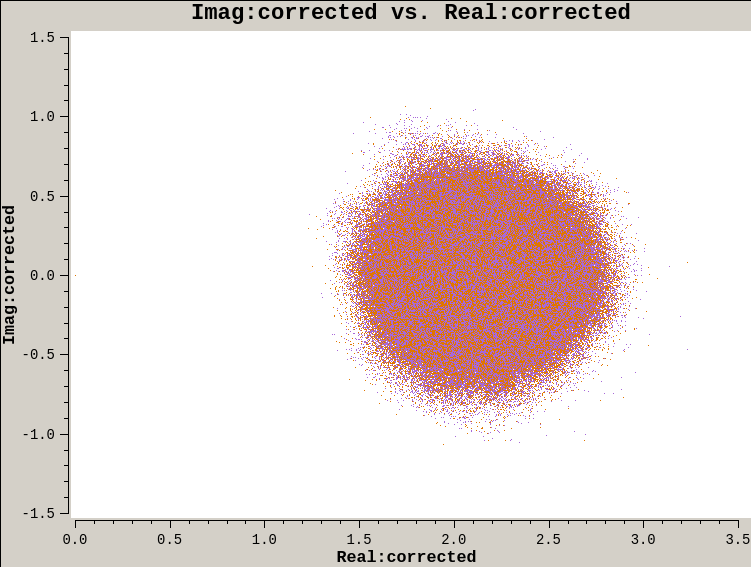

In [ ]:
plotms(vis=SECDB, xaxis="real", yaxis="imag", correlation="XX,YY", ydatacolumn="corrected", 
       xdatacolumn="corrected", coloraxis="corr", avgbaseline=False, uvrange=">1m",
       plotfile="secondary.corr.reim.png", showgui=False, overwrite=True)
Image("secondary.corr.reim.png")

We now transfer the flux and bandpass solutions from the primary and the phases derived using the secondary onto the target field to conclude transfer calibration. Please note that you must still inspect the visibilities of your transfer calibrated target data prior to imaging. Strong RFI from a partially phase coherent source such as a GNSS satellite will show up as very strong fringes across the field of view in the synthesized maps.

In [ ]:
applycal(vis=TARGETDB, field="RXCJ1638.2-6420",
         interp=["nearest", "linear", "linear", "linear"], 
         gaintable=["prim.B0", "prim.F0", "sec.K0", "sec.G0"], 
         gainfield=["J1939-6342", "J1939-6342", "J1859-6615", "J1859-6615"])

2021-06-28 00:13:07	INFO	applycal::::casa	##########################################
2021-06-28 00:13:07	INFO	applycal::::casa	##### Begin Task: applycal           #####
2021-06-28 00:13:07	INFO	applycal::::casa	applycal( vis='/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms', field='RXCJ1638.2-6420', spw='', intent='', selectdata=True, timerange='', uvrange='', antenna='', scan='', observation='', msselect='', docallib=False, callib='', gaintable=['prim.B0', 'prim.F0', 'sec.K0', 'sec.G0'], gainfield=['J1939-6342', 'J1939-6342', 'J1859-6615', 'J1859-6615'], interp=['nearest', 'linear', 'linear', 'linear'], spwmap=[], calwt=[True], parang=False, applymode='', flagbackup=True )
2021-06-28 00:13:07	INFO	applycal::calibrater::open	****Using NEW VI2-driven calibrater tool****
2021-06-28 00:13:07	INFO	applycal::calibrater::open	Opening MS: /content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms for calibration.
2021-06-28 00:13:07	

2021-06-28 00:13:13	INFO	plotms::::casa	##########################################
2021-06-28 00:13:13	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:13:13	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='frequency', xdatacolumn='', xframe='', xinterp='', yaxis='amp', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='1~100m', antenna='', scan='', correlation='XY,YX', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False

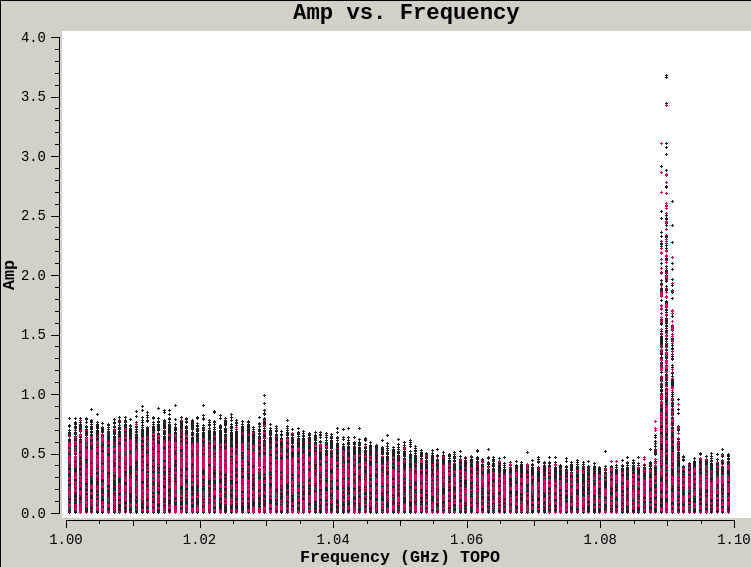

In [ ]:
plotms(vis=TARGETDB, xaxis="frequency", yaxis="amp", correlation="XY,YX", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=False, uvrange="1~100m", 
       plotfile="target.short.raw.ampfreq.png", showgui=False, overwrite=True)
Image("target.short.raw.ampfreq.png")

In [ ]:
flagdata(vis=TARGETDB, spw="0:1.0875~1.0925ghz")
flagmanager(vis=TARGETDB, mode="save", versionname="TRANSFER_CAL_FLAGS")

2021-06-28 00:13:19	INFO	flagdata::::casa	##########################################
2021-06-28 00:13:19	INFO	flagdata::::casa	##### Begin Task: flagdata           #####
2021-06-28 00:13:19	INFO	flagdata::::casa	flagdata( vis='/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms', mode='manual', autocorr=False, inpfile='', reason='any', tbuff=0.0, spw='0:1.0875~1.0925ghz', field='', antenna='', uvrange='', timerange='', correlation='', scan='', intent='', array='', observation='', feed='', clipminmax=[], datacolumn='DATA', clipoutside=True, channelavg=False, chanbin=1, timeavg=False, timebin='0s', clipzeros=False, quackinterval=1.0, quackmode='beg', quackincrement=False, tolerance=0.0, addantenna='', lowerlimit=0.0, upperlimit=90.0, ntime='scan', combinescans=False, timecutoff=4.0, freqcutoff=3.0, timefit='line', freqfit='poly', maxnpieces=7, flagdimension='freqtime', usewindowstats='none', halfwin=1, extendflags=True, winsize=3, timedev='', freqdev='', ti

2021-06-28 00:13:20	INFO	plotms::::casa	##########################################
2021-06-28 00:13:20	INFO	plotms::::casa	##### Begin Task: plotms             #####
2021-06-28 00:13:20	INFO	plotms::::casa	plotms( vis='/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms', gridrows=1, gridcols=1, rowindex=0, colindex=0, plotindex=0, xaxis='frequency', xdatacolumn='', xframe='', xinterp='', yaxis='amp', ydatacolumn='data', yframe='', yinterp='', yaxislocation='', selectdata=True, field='', spw='', timerange='', uvrange='', antenna='', scan='', correlation='XY,YX', array='', observation='', intent='', feed='', msselect='', averagedata=True, avgchannel='', avgtime='', avgscan=False, avgfield=False, avgbaseline=False, avgantenna=False, avgspw=False, scalar=False, transform=True, freqframe='', restfreq='', veldef='RADIO', shift=[0.0, 0.0], extendflag=False, extcorr=False, extchannel=False, iteraxis='', xselfscale=False, yselfscale=False, xsharedaxis=False, ysha

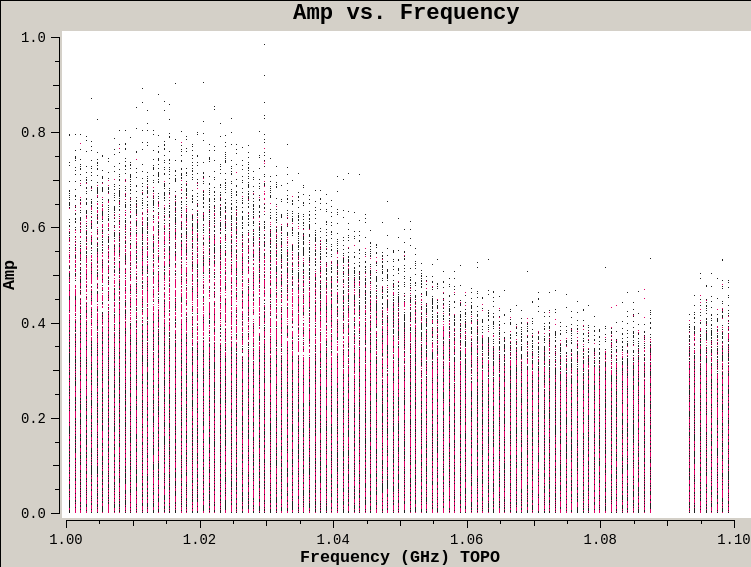

In [ ]:
plotms(vis=TARGETDB, xaxis="frequency", yaxis="amp", correlation="XY,YX", ydatacolumn="data", 
       coloraxis="corr", avgbaseline=False, 
       plotfile="target.raw.ampfreq.png", showgui=False, overwrite=True)
Image("target.raw.ampfreq.png")

# Imaging and example self calibration

Before we get started on imaging lets verify the sampling rate - we estimate this from assuming the response of the interferometer (PSF) can be approximated by an Airy disk. We use the Nyquist sampling theorem to work out the sampling rate in image space.

We read off the wavelength and maximum baseline length here to give you an example of how to open the database in code. Please view CASA memo 229 to
get an idea of the format of the schema of the relational database.

In [ ]:
# get the maximum uvw
# refer to memo 229 for details on the table structure
# https://casacore.github.io/casacore-notes/229.html
import numpy as np
tb = table()
ccqa = quanta()
tb.open(TARGETDB+"::SPECTRAL_WINDOW", nomodify=True)
minlda = ccqa.constants("c")["value"] / tb.getcol("CHAN_FREQ").max()
print("Minimum wavelength {0:.3f} [m]".format(minlda))
tb.close()
tb.open(TARGETDB, nomodify=True)
uvw = tb.getcol("UVW").T
maxuvdist = np.sqrt(np.sum(uvw[:,0:2]**2, axis=1)).max()
print("Maximum uvdist {0:.3f} [m]".format(maxuvdist))
print("Est Nyquist rate {0:.3f}asec".format(np.rad2deg(1.220 * minlda / (2 * maxuvdist)) * 3600.))
tb.close()
pass



Minimum wavelength 0.273 [m]
Maximum uvdist 4260.885 [m]
Est Nyquist rate 8.054asec


Make an image of the transfer calibrated visibilities. For this we use the ```tclean``` task in CASA. We correct approximately for non-coplanar sampling by splitting the sky into facets.

In [ ]:
! rm RXCJ1638.2-6420.1GC* -rf
tclean(vis=TARGETDB, 
       field="RXCJ1638.2-6420", 
       imagename="RXCJ1638.2-6420.1GC", 
       datacolumn="corrected", 
       imsize=4096, 
       cell="2.2arcsec", # few px across the PSF with a maximum spacing of 4477.61
       stokes="I",
       nchan=2,
       specmode="mfs",
       gridder="widefield",
       wprojplanes=1,
       facets=3, # very crude - may need to be more with longer spacings included
       weighting="briggs",
       robust=0.0,
       niter=5000,
       savemodel="modelcolumn",
       )
exportfits(imagename="RXCJ1638.2-6420.1GC.image/", fitsimage="RXCJ1638.2-6420.1GC.image.fits", overwrite=True)
exportfits(imagename="RXCJ1638.2-6420.1GC.residual/", fitsimage="RXCJ1638.2-6420.1GC.residual.fits", overwrite=True)
! cleanmask -i RXCJ1638.2-6420.1GC.image.fits -o RXCJ1638.2-6420.1GC.FITSMASK.fits -s 5 -it 50 -nb 25 -ol 0.4 -t 1.6 -nn
importfits(imagename="RXCJ1638.2-6420.1GC.FITSMASK/", fitsimage="RXCJ1638.2-6420.1GC.FITSMASK.fits")
tclean(vis=TARGETDB, 
       field="RXCJ1638.2-6420", 
       imagename="RXCJ1638.2-6420.1GC.usermasked", 
       datacolumn="corrected", 
       imsize=4096, 
       cell="2.2arcsec", # few px across the PSF with a maximum spacing of 4477.61
       stokes="I",
       nchan=2,
       specmode="mfs",
       gridder="widefield",
       wprojplanes=1,
       facets=3, # very crude - may need to be more with longer spacings included
       weighting="briggs",
       robust=0.0,
       niter=5000,
       usemask="user",
       mask="RXCJ1638.2-6420.1GC.FITSMASK",
       savemodel="modelcolumn",
       )
exportfits(imagename="RXCJ1638.2-6420.1GC.usermasked.image/", fitsimage="RXCJ1638.2-6420.1GC.usermasked.image.fits", overwrite=True)
exportfits(imagename="RXCJ1638.2-6420.1GC.usermasked.residual/", fitsimage="RXCJ1638.2-6420.1GC.usermasked.residual.fits", overwrite=True)

2021-06-28 00:14:32	INFO	tclean::::casa	##########################################
2021-06-28 00:14:32	INFO	tclean::::casa	##### Begin Task: tclean             #####
2021-06-28 00:14:32	INFO	tclean::::casa	tclean( vis='/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms', selectdata=True, field='RXCJ1638.2-6420', spw='', timerange='', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='corrected', imagename='RXCJ1638.2-6420.1GC', imsize=4096, cell='2.2arcsec', phasecenter='', stokes='I', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=2, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='widefield', facets=3, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, rotatepastep=360.0, pointingoffsetsigdev=[], pblimit=0.2, normtype='

In [ ]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
with fits.open("RXCJ1638.2-6420.1GC.usermasked.image.fits") as f:
  hdu = f[0]
  hdudata = hdu.data
  wcs = WCS(hdu.header)
  wcsslice = wcs.slice(np.s_[0,0,:,:])
plt.figure(figsize=(9,9), dpi=120)
plt.subplot(projection=wcsslice)
plt.imshow(hdudata[0,0,:,:], vmin=-0.001073, vmax=0.001819, origin='lower', cmap="cubehelix")
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.text(50,50, "RESTORED: RXCJ1638.2-6420", fontsize='large', color='w')
with fits.open("RXCJ1638.2-6420.1GC.usermasked.residual.fits") as f:
  hdu = f[0]
  hdudata = hdu.data
  wcs = WCS(hdu.header)
  wcsslice = wcs.slice(np.s_[0,0,:,:])
plt.figure(figsize=(9,9), dpi=120)
plt.subplot(projection=wcsslice)
plt.imshow(hdudata[0,0,:,:], vmin=-0.001073, vmax=0.001819, origin='lower', cmap="cubehelix")
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.text(50,50, "RESIDUAL: RXCJ1638.2-6420", fontsize='large', color='w')
with fits.open("RXCJ1638.2-6420.1GC.FITSMASK.fits") as f:
  hdu = f[0]
  hdudata = hdu.data
  wcs = WCS(hdu.header)
  wcsslice = wcs.slice(np.s_[0,0,:,:])
plt.figure(figsize=(9,9), dpi=120)
plt.subplot(projection=wcsslice)
plt.imshow(hdudata[0,0,:,:], vmin=-0.001073, vmax=0.001819, origin='lower', cmap="cubehelix")
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.text(50,50, "MASK: RXCJ1638.2-6420", fontsize='large', color='w')

Output hidden; open in https://colab.research.google.com to view.

Now we self calibrate towards the derived model. It is important that you use the same flags used when deriving the model. You can play around with solution intervals below

In [ ]:
flagmanager(vis=TARGETDB, mode="restore", versionname="TRANSFER_CAL_FLAGS")
gaincal(vis=TARGETDB, field="RXCJ1638.2-6420", caltable="target.G0", 
        gaintype="G", 
        calmode="p",
        interp=["linear","linear","nearest"], 
        gaintable=["prim.B0","prim.F0","sec.K0"], 
        gainfield=["J1939-6342","J1939-6342","J1859-6615"], 
        combine="", solint="48s")
applycal(vis=TARGETDB, field="RXCJ1638.2-6420",
         interp=["nearest", "linear", "nearest", "linear"], 
         gaintable=["prim.B0", "prim.F0", "sec.K0", "target.G0"], 
         gainfield=["J1939-6342", "J1939-6342", "J1859-6615", "RXCJ1638.2-6420"])

2021-06-28 00:36:31	INFO	flagmanager::::casa	##########################################
2021-06-28 00:36:31	INFO	flagmanager::::casa	##### Begin Task: flagmanager        #####
2021-06-28 00:36:31	INFO	flagmanager::::casa	flagmanager( vis='/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms', mode='restore', versionname='TRANSFER_CAL_FLAGS', oldname='', comment='', merge='replace' )
2021-06-28 00:36:31	INFO	flagmanager::AgentFlagger::open	Table type is Measurement Set
2021-06-28 00:36:31	INFO	flagmanager::::casa	Restore flagversions TRANSFER_CAL_FLAGS
2021-06-28 00:36:31	INFO	flagmanager::::casa	Task flagmanager complete. Start time: 2021-06-28 00:36:30.760766 End time: 2021-06-28 00:36:30.859767
2021-06-28 00:36:31	INFO	flagmanager::::casa	##### End Task: flagmanager          #####
2021-06-28 00:36:31	INFO	flagmanager::::casa	##########################################

2021-06-28 00:36:31	INFO	gaincal::::casa	##########################################
202

In [ ]:
! rm RXCJ1638.2-6420.SC0.masked* -rf
tclean(vis=TARGETDB, 
       field="RXCJ1638.2-6420", 
       imagename="RXCJ1638.2-6420.SC0.usermasked", 
       datacolumn="corrected", 
       imsize=4096, 
       cell="2.2arcsec", # few px across the PSF with a maximum spacing of 4477.61
       stokes="I",
       nchan=2,
       specmode="mfs",
       gridder="widefield",
       wprojplanes=1,
       facets=3, # very crude - may need to be more with longer spacings included
       weighting="briggs",
       robust=0.0,
       niter=7000,
       usemask="user",
       mask="RXCJ1638.2-6420.1GC.FITSMASK"
       )
exportfits(imagename="RXCJ1638.2-6420.SC0.usermasked.image/", fitsimage="RXCJ1638.2-6420.SC0.usermasked.image.fits", overwrite=True)
exportfits(imagename="RXCJ1638.2-6420.SC0.usermasked.residual/", fitsimage="RXCJ1638.2-6420.SC0.usermasked.residual.fits", overwrite=True)

2021-06-28 00:37:11	INFO	tclean::::casa	##########################################
2021-06-28 00:37:11	INFO	tclean::::casa	##### Begin Task: tclean             #####
2021-06-28 00:37:11	INFO	tclean::::casa	tclean( vis='/content/ARIWS/1559937657.RXCJ1638.2-6420.1.0.1.1.ghz.avg832khz12s.12ants.scan2.ms', selectdata=True, field='RXCJ1638.2-6420', spw='', timerange='', uvrange='', antenna='', scan='', observation='', intent='', datacolumn='corrected', imagename='RXCJ1638.2-6420.SC0.usermasked', imsize=4096, cell='2.2arcsec', phasecenter='', stokes='I', projection='SIN', startmodel='', specmode='mfs', reffreq='', nchan=2, start='', width='', outframe='LSRK', veltype='radio', restfreq=[], interpolation='linear', perchanweightdensity=True, gridder='widefield', facets=3, psfphasecenter='', wprojplanes=1, vptable='', mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False, cfcache='', usepointing=False, computepastep=360.0, rotatepastep=360.0, pointingoffsetsigdev=[], pblimit=0.2,

In [ ]:
with fits.open("RXCJ1638.2-6420.1GC.usermasked.residual.fits") as f:
  hdu = f[0]
  hdudata = hdu.data
  wcs = WCS(hdu.header)
  wcsslice = wcs.slice(np.s_[0,0,:,:])
plt.figure(figsize=(9,9), dpi=120)
plt.subplot(projection=wcsslice)
plt.imshow(hdudata[0,0,:,:], vmin=-0.001073, vmax=0.001819*0.5, origin='lower', cmap="cubehelix")
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.text(50,50, "1GC RESIDUAL: RXCJ1638.2-6420", fontsize='large', color='w')
with fits.open("RXCJ1638.2-6420.SC0.usermasked.residual.fits") as f:
  hdu = f[0]
  hdudata = hdu.data
  wcs = WCS(hdu.header)
  wcsslice = wcs.slice(np.s_[0,0,:,:])
plt.figure(figsize=(9,9), dpi=120)
plt.subplot(projection=wcsslice)
plt.imshow(hdudata[0,0,:,:], vmin=-0.001073, vmax=0.001819*0.5, origin='lower', cmap="cubehelix")
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.text(50,50, "SC0 RESIDUAL: RXCJ1638.2-6420", fontsize='large', color='w')
with fits.open("RXCJ1638.2-6420.SC0.usermasked.image.fits") as f:
  hdu = f[0]
  hdudata = hdu.data
  wcs = WCS(hdu.header)
  wcsslice = wcs.slice(np.s_[0,0,:,:])
plt.figure(figsize=(9,9), dpi=120)
plt.subplot(projection=wcsslice)
plt.imshow(hdudata[0,0,:,:], vmin=-0.001073, vmax=0.001819, origin='lower', cmap="cubehelix")
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (ICRS)')
plt.ylabel('Declination (ICRS)')
plt.text(50,50, "SC0 RESTORED: RXCJ1638.2-6420", fontsize='large', color='w')

Output hidden; open in https://colab.research.google.com to view.